In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import plot_tree
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve, 
                             confusion_matrix, ConfusionMatrixDisplay, auc)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.tree import export_graphviz
import graphviz

Inisialisasi libary yang dibutuhkan, library numpy untuk operasi numerik, pandas untuk manipulasi data, matplotlib untuk visualisasi, sklearn untuk implementasi atau membangun model DecisionTree dan graphviz untuk visualisasi decision Tree 

In [8]:
df = pd.read_csv('CreditDataset.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())


    x1  x2   x3   x4    x5   x6   x7  x8   x9   x10  ...   x12 x13   x14  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

    x15 x16   x17 x18   x19   x20 Class  
0  A152   2  A173   1  A192  A201     1  
1  A152   1  A173   1  A191  A201     2  
2  A152   1  A172   2  A191  A201     1  
3  A153   1  A173   2  A191  A201     1  
4  A153   2  A173   2  A191  A201     2  

[5 rows x 21 columns]


Membaca dataset CreditDataset.csv dan menampilkan 5 baris data utama pada dataset

In [9]:
# Check for missing values
print(df.isnull().sum())

x1       0
x2       0
x3       0
x4       0
x5       0
x6       0
x7       0
x8       0
x9       0
x10      0
x11      0
x12      0
x13      0
x14      0
x15      0
x16      0
x17      0
x18      0
x19      0
x20      0
Class    0
dtype: int64


Mengecek pada setiap kolom apakah ada yang mengandung missing values apa tidak ada

In [10]:
print(df.columns)

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'Class'],
      dtype='object')


Menampilkan semua nama kolom pada dataset

In [11]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

Bagian untuk mengonversi data kategorikal pada dataset menjadi bentuk numerik

In [12]:
X = df.drop('Class', axis=1)  
y = df['Class']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mengatur fitur X(independent variabel) dan Y (dependent variabel) . X disini yang digunakan semua kolom(x1,x2,x3,dan lain lain) kecuali Class, sedangkan pada Y yang digunakan adalah Class. Dan membagi dataset yang digunakan data training 80% dan testing 20%

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Pakai StandarScaler untuk melakukan scaling pada fitur agar berada dalam rentang yang sama secara standar.
Pakai fit_transform pada training buat menghitung standar deviasi dan menghitung rata-rata. Dan pakai transform pada testing agar dapat memiliki skala yang sama tidak perlu menghitung ulang deviasi dan rata-rata.

In [14]:
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

Training model Classfication Decision Tree pakai data training

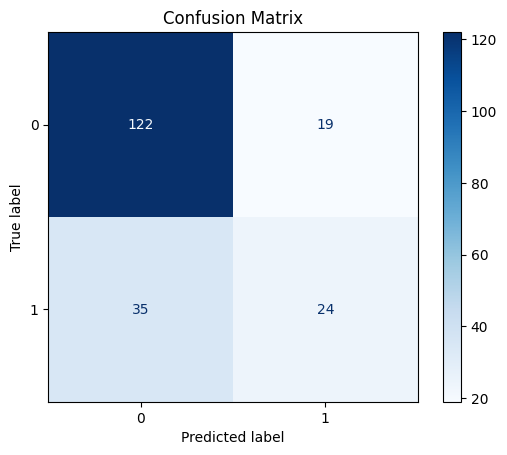

Accuracy: 0.73
Precision: 0.71
Recall: 0.73
F1 Score: 0.72


In [20]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multi-class
print(f'Precision: {precision:.2f}')

recall = recall_score(y_test, y_pred, average='weighted')  # Weighted for multi-class
print(f'Recall: {recall:.2f}')

f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted for multi-class
print(f'F1 Score: {f1:.2f}')

Pada hasil CM tersebut terdapat:

122 TF(True Negative) pada kelas negatif(0) yang berarti ada 122 prediksi benar actual class ke negatif(0)

24 TP(True Positive) pada kelas positif(1) yang berarti ada 24 prediksi benar actual class ke positif(0)

19 FP(False Positive) yang berarti ada 19 prediksi salah ke kelas positif(1) , namun actual classnya adalah kelas negatif(0)

35 FN(False Negative) yang berarti ada 35 prediksi salah kelas negatif(0) , namun actual classnya adalah kelas positif(1)

Dan akurasi memperoleh 73% model cukup bagus dalam memprediksi benar dari seluruh data testing. Untuk Precision Recall dan F1 pun sama sekitar 70% yang berarti model tersebut memiliki kinerja cukup bagus dan cukup seimbang dalam mengidentifikasi kelas positif dengan mengurangi terjadinya hasil FP dan FN





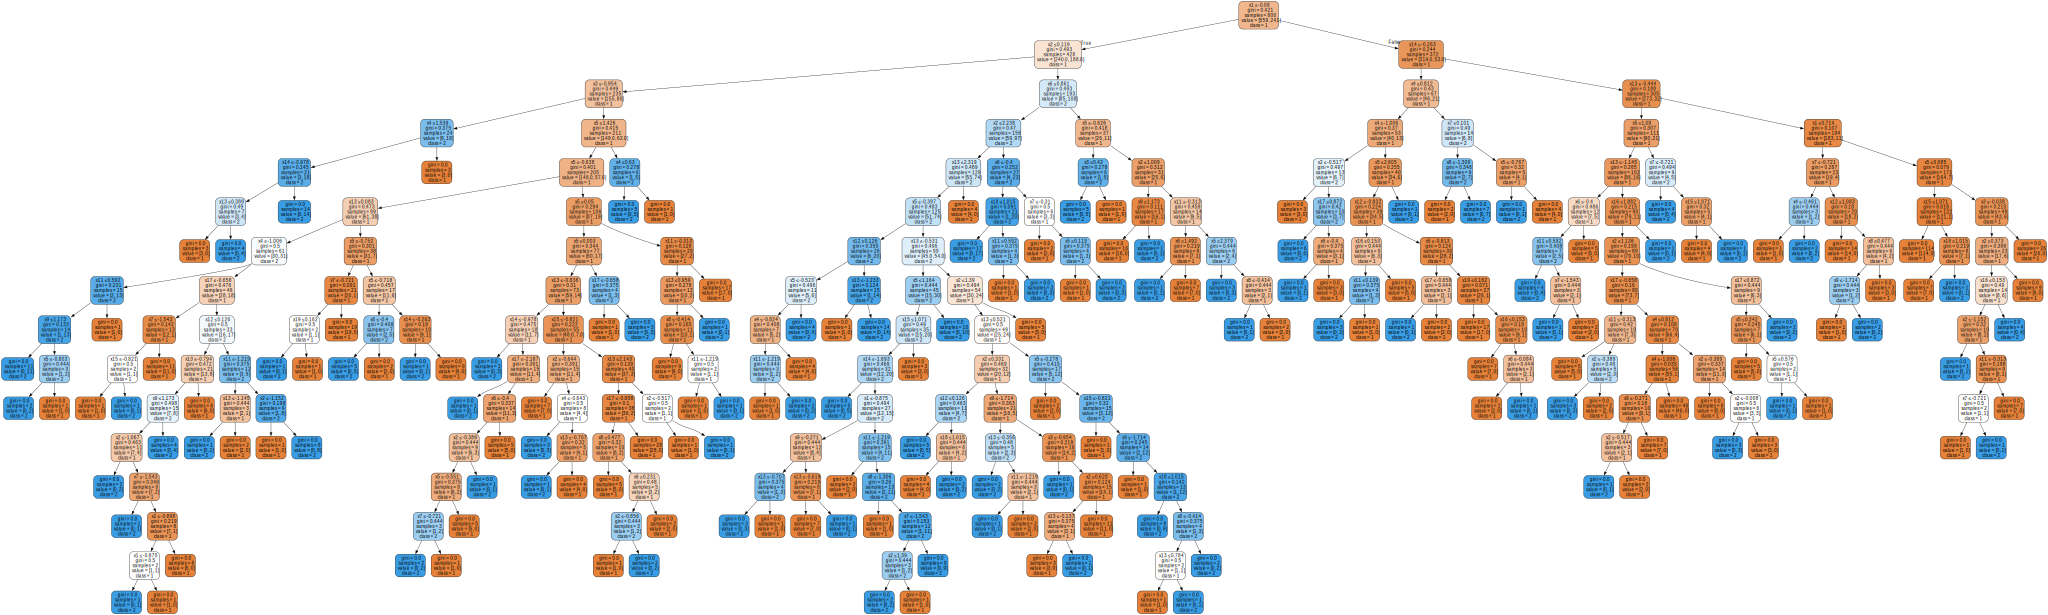

In [16]:
dot_data = export_graphviz(dt_classifier, 
                            out_file=None, 
                            feature_names=X.columns, 
                            class_names=np.unique(y).astype(str), 
                            filled=True, 
                            rounded=True, 
                            special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")  
graph  

Bagian menghasilkan visualisasi decision Tree yang telah di training

Size of y_bin: (200, 1)
Size of y_pred_proba: (200, 2)


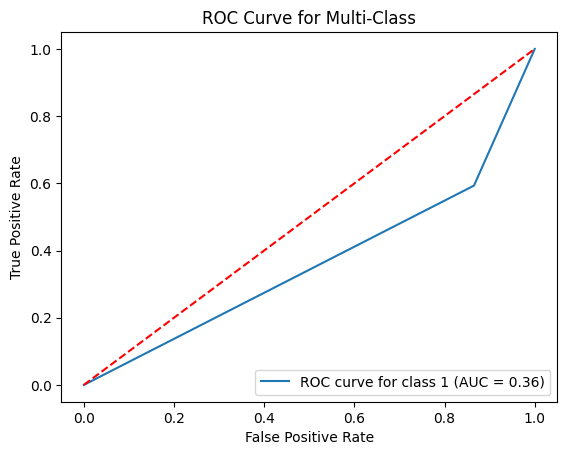

AUC for class 1: 0.36


In [23]:
# Binarize output
y_bin = label_binarize(y_test, classes=np.unique(y))  
n_classes = y_bin.shape[1]  

# Dapatkan probabilitas prediksi
y_pred_proba = dt_classifier.predict_proba(X_test)

print(f'Size of y_bin: {y_bin.shape}')  
print(f'Size of y_pred_proba: {y_pred_proba.shape}')  

roc_auc = {}
plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_pred_proba[:, i])  
    roc_auc[i] = auc(fpr, tpr)  
    plt.plot(fpr, tpr, label=f'ROC curve for class {i + 1} (AUC = {roc_auc[i]:.2f})')  

plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC Curve for Multi-Class')  
plt.legend(loc='lower right')  
plt.show() 

# Tampilkan nilai AUC untuk setiap kelas
for i in range(n_classes):
    print(f'AUC for class {i + 1}: {roc_auc[i]:.2f}')

Pada hasil grafik ROC terdapat hasil pada AUC 0.36 pada Class 1. Dapat disimpulkan bahwa model memiliki kurang perfoma dalam memprediksi atau membedakan kelas dengan baik